# Caribbean Region Temperature Anomalies Forecasts (12 months) using Meta Prophet

In this notebook, we will forecast temperature anomalies for the next year using the open-source forecasting tool developed by Facebook. This tool is famous for being particulary usefull with seasonal time series data. It is designed to be user-friendly and handles missing data and outliers very well. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [16]:
#First, let's import out dataset

# Load the dataset

from utils import load_caribbean_weather

df = load_caribbean_weather()

temp = df[['temp_anomaly']]

## Instantiate the Prophet model

In [17]:
# Instantiate and fit the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',  # Anomalies are deviations; additive works well
    changepoint_prior_scale=0.05  # Moderate flexibility in trend
)

temp = temp.reset_index()


In [18]:
temp

,date,temp_anomaly
0,1980-01-01,0.29
1,1980-02-01,0.31
2,1980-03-01,0.28
3,1980-04-01,0.29
4,1980-05-01,0.35
...,...,...
545,2025-06-01,1.02
546,2025-07-01,1.00
547,2025-08-01,1.04
548,2025-09-01,1.06


In [19]:

ds = temp['date']
y = temp['temp_anomaly']

df = pd.DataFrame({'ds': ds, 'y': y})
df

,ds,y
0,1980-01-01,0.29
1,1980-02-01,0.31
2,1980-03-01,0.28
3,1980-04-01,0.29
4,1980-05-01,0.35
...,...,...
545,2025-06-01,1.02
546,2025-07-01,1.00
547,2025-08-01,1.04
548,2025-09-01,1.06


### Fit the model 

In [21]:
model.fit(df)

# Make future dataframe for the next 12 months (Jan 2026 to Dec 2026)
future = model.make_future_dataframe(periods=12, freq='MS')

23:10:08 - cmdstanpy - INFO - Chain [1] start processing
23:10:10 - cmdstanpy - INFO - Chain [1] done processing


### Forecast for the next 12 months

In [22]:
# Generate forecast
forecast = model.predict(future)

### Display the forecast and plot

Forecasted Caribbean SST Anomalies for 2026 (°C):
          ds  yhat  yhat_lower  yhat_upper
550  2025-11  1.06        0.83        1.32
551  2025-12  1.06        0.81        1.32
552  2026-01  1.04        0.80        1.30
553  2026-02  1.05        0.79        1.30
554  2026-03  1.04        0.79        1.30
555  2026-04  1.05        0.79        1.32
556  2026-05  1.05        0.82        1.28
557  2026-06  1.06        0.82        1.29
558  2026-07  1.07        0.80        1.32
559  2026-08  1.08        0.86        1.32
560  2026-09  1.09        0.85        1.33
561  2026-10  1.09        0.83        1.36


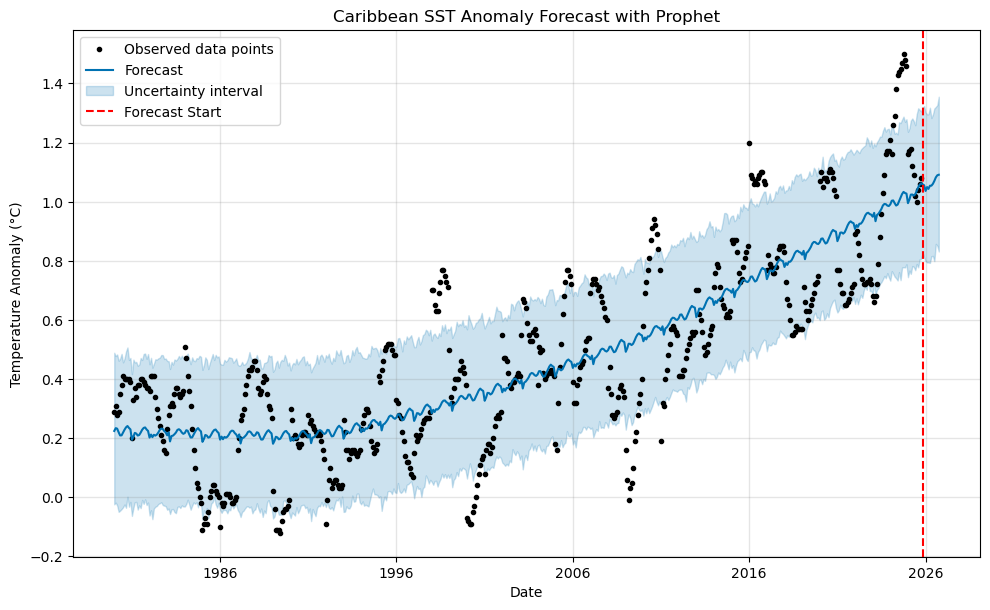

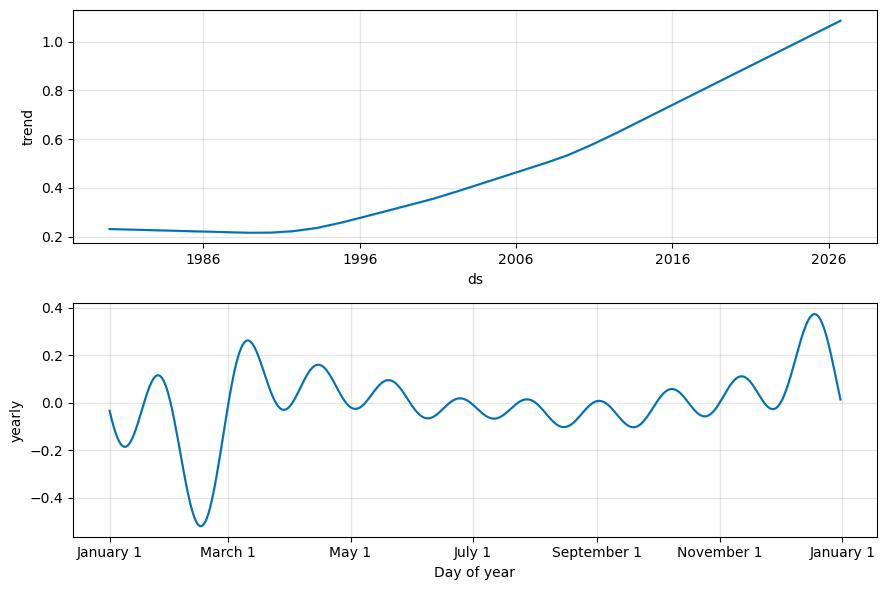

In [26]:
# Display the forecast for the next 12 months
forecast_next_12 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
forecast_next_12 = forecast_next_12.round(2)
forecast_next_12['ds'] = forecast_next_12['ds'].dt.strftime('%Y-%m')

print("Forecasted Caribbean SST Anomalies for 2026 (°C):")
print(forecast_next_12[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Optional: Plot the results
fig1 = model.plot(forecast)

# Get the date where forecast begins (first date not in historical data)
last_historical_date = df['ds'].max()
forecast_start_date = forecast[forecast['ds'] > last_historical_date]['ds'].min()
ax = fig1.gca()  # Get current axes
# Add red dashed vertical line at the start of the forecast period
ax.axvline(x=forecast_start_date, color='red', linestyle='--', linewidth=1.5, label='Forecast Start')


plt.title('Caribbean SST Anomaly Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

# Plot components (trend + yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()